In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreadsbooks/books.csv


In [51]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
import re
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO

In [52]:
df=pd.read_csv("/kaggle/input/goodreadsbooks/books.csv",error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [53]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [54]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [55]:
df.shape

(11123, 12)

In [56]:
df['bookID'].nunique()

11123

In [57]:
df.index=df['bookID']

In [58]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [59]:
most_occurent_books=df['title'].value_counts()[:15]

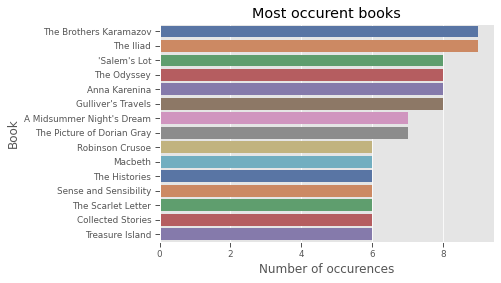

In [60]:
sns.barplot(x=most_occurent_books,y=most_occurent_books.index,palette='deep')
plt.title('Most occurent books')
plt.xlabel('Number of occurences')
plt.ylabel('Book')
plt.show()

In [61]:
Freq_authors=df['authors'].value_counts()[:10]

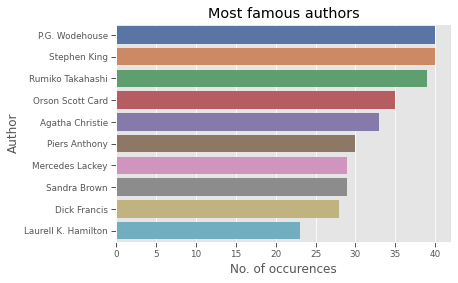

In [62]:
sns.barplot(x=Freq_authors,y=Freq_authors.index,palette='deep')
plt.title('Most famous authors')
plt.xlabel('No. of occurences')
plt.ylabel('Author')
plt.show()

In [63]:
author=Freq_authors.index

In [64]:
print(author)

Index(['P.G. Wodehouse', 'Stephen King', 'Rumiko Takahashi',
       'Orson Scott Card', 'Agatha Christie', 'Piers Anthony',
       'Mercedes Lackey', 'Sandra Brown', 'Dick Francis',
       'Laurell K. Hamilton'],
      dtype='object')


In [65]:
lang=df['language_code'].value_counts()

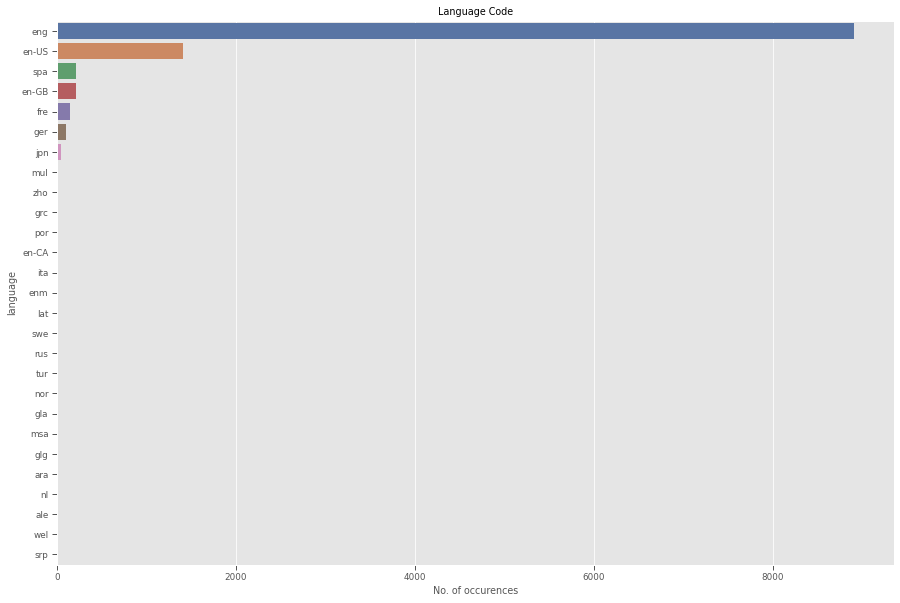

In [66]:
sns.set_context('paper')
plt.figure(figsize=(15,10))
sns.barplot(x=lang,y=lang.index,palette='deep')
plt.title('Language Code')
plt.xlabel('No. of occurences')
plt.ylabel('language')
plt.show()

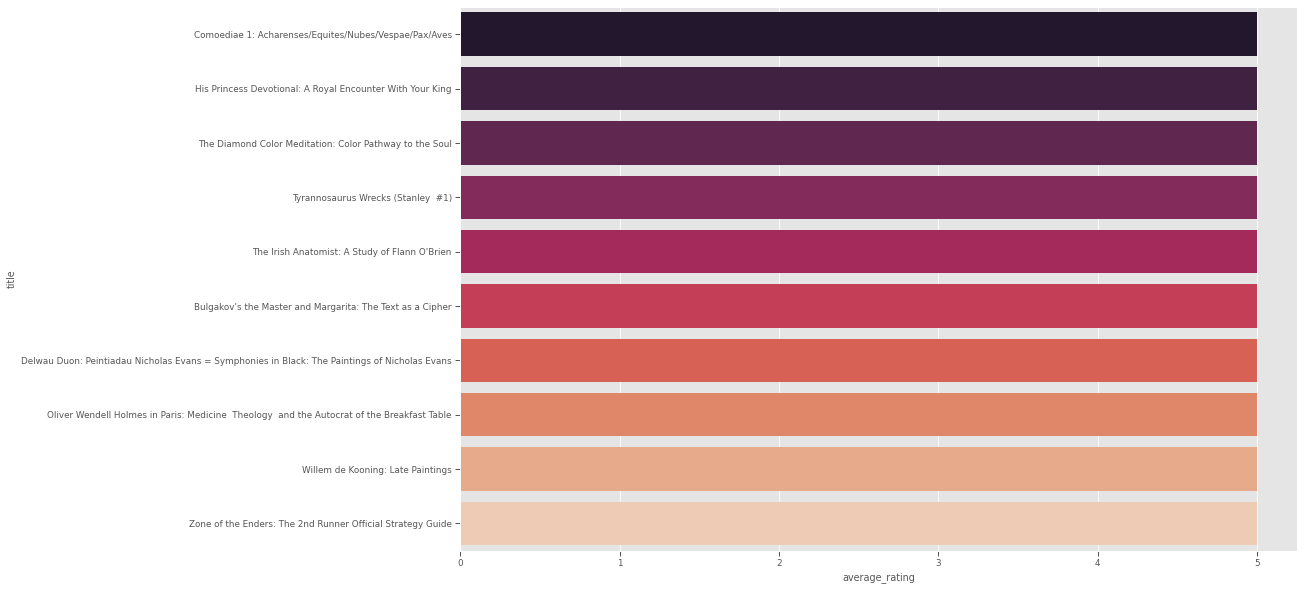

In [67]:
most_rated=df.sort_values('average_rating',ascending=False).head(10).set_index('title')
plt.figure(figsize=(15,10))
plt.xlabel('rating')
plt.ylabel('book')
sns.barplot(most_rated['average_rating'], most_rated.index, palette='rocket')

In [68]:
most_rated=df.sort_values('average_rating',ascending=False).head(50).set_index('title')

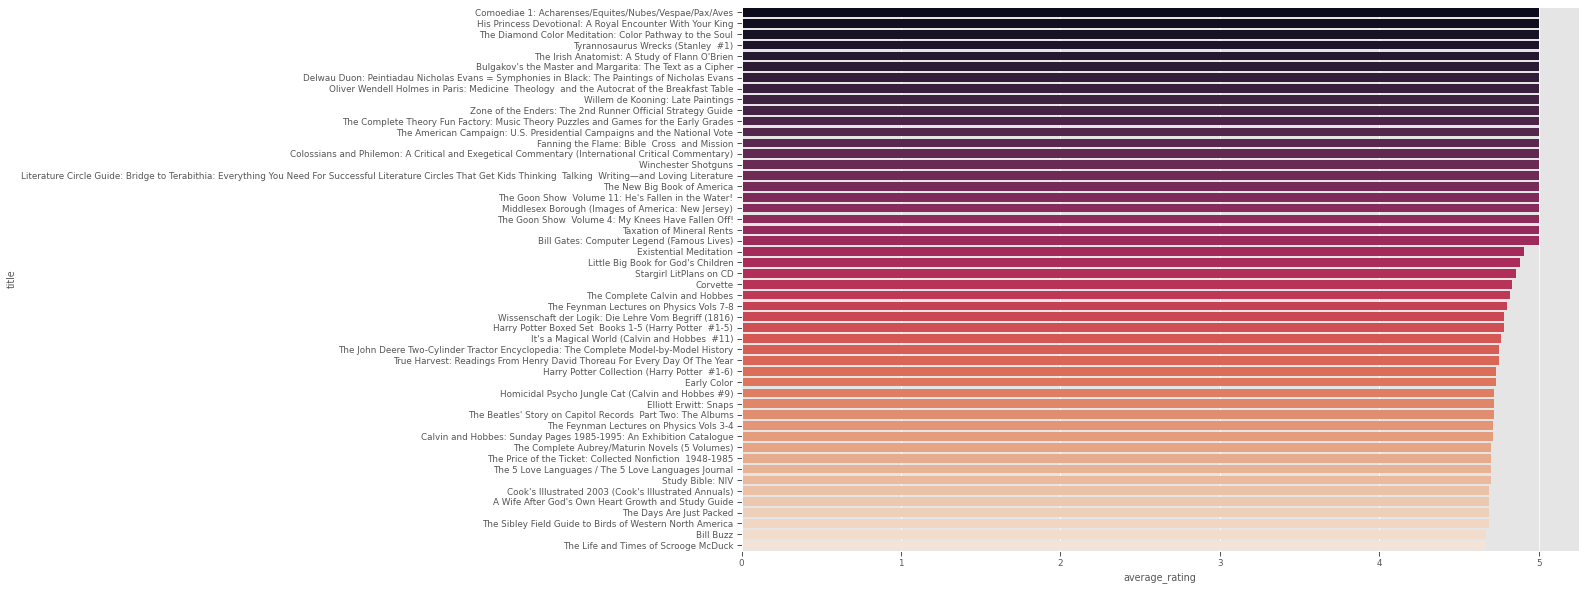

In [69]:
plt.figure(figsize=(15,10))
plt.xlabel('rating')
plt.ylabel('book')
sns.barplot(most_rated['average_rating'], most_rated.index, palette='rocket')

In [70]:
most_rated=df.sort_values('average_rating',ascending=False).head(50).set_index('authors')

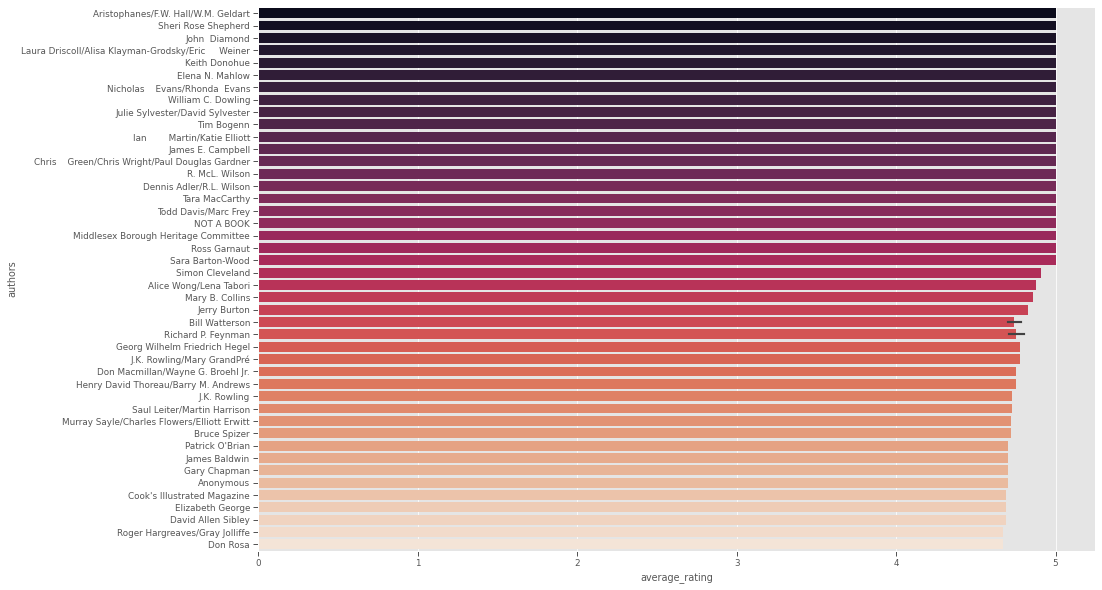

In [71]:
plt.figure(figsize=(15,10))
plt.xlabel('rating')
plt.ylabel('author')
sns.barplot(most_rated['average_rating'], most_rated.index, palette='rocket')

In [72]:
df['publisher'].nunique()

2290

In [73]:
publishers=df['publisher'].value_counts()[:20]

In [74]:
publishers.head(5)

Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
Name: publisher, dtype: int64

<Figure size 1080x720 with 0 Axes>

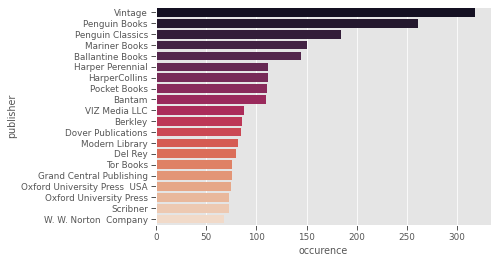

<Figure size 1080x720 with 0 Axes>

In [75]:
sns.barplot(x=publishers,y=publishers.index,palette='rocket')
plt.xlabel('occurence')
plt.ylabel('publisher')
plt.figure(figsize=(15,10))


In [76]:
most_rated=df.sort_values('average_rating',ascending=False).head(50).set_index('publisher')

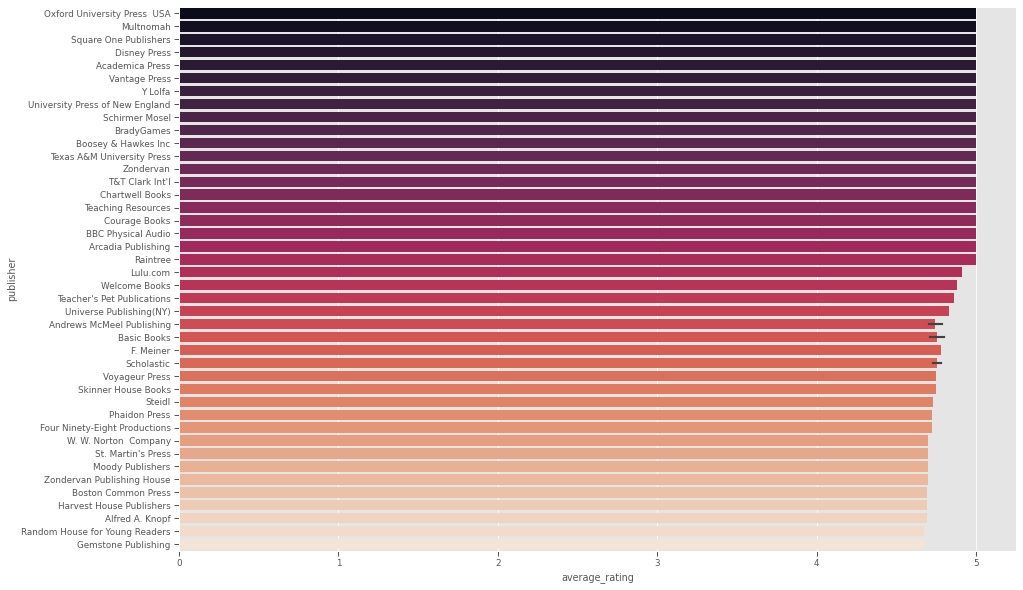

In [77]:
plt.figure(figsize=(15,10))
plt.xlabel('rating')
plt.ylabel('publisher')
sns.barplot(most_rated['average_rating'], most_rated.index, palette='rocket')

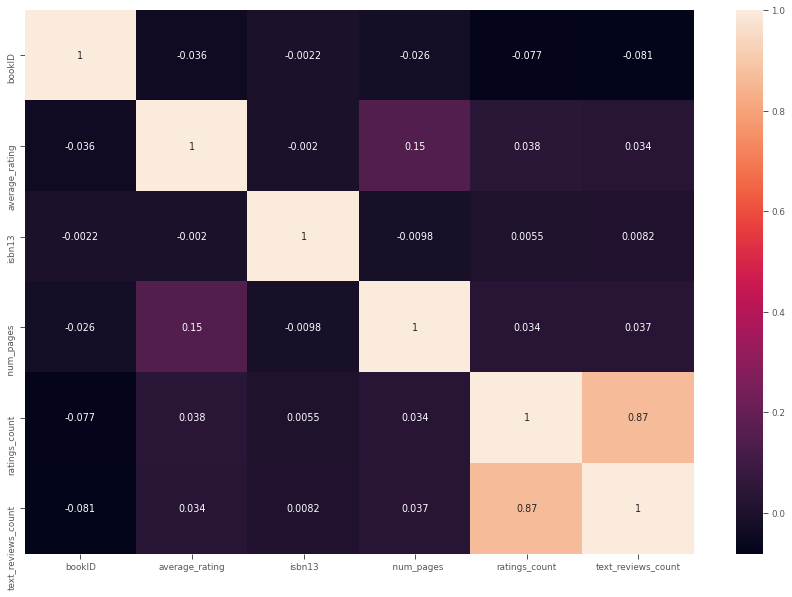

In [155]:
plt.figure(figsize=(15,10))

corr=df.corr()
sns.heatmap(corr,annot=True)

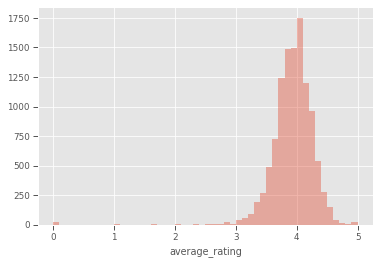

In [156]:
sns.distplot(df['average_rating'],kde=False)


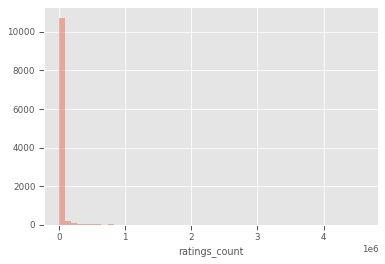

In [160]:
sns.distplot(df['ratings_count'],kde=False)


In [78]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [79]:
df1=df[['title','authors','average_rating']]

In [80]:
df1.head()

,title,authors,average_rating
bookID,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78


In [81]:
#Generalised or a demographic filter
demo=df1.sort_values('average_rating',ascending=False).set_index('title')


In [82]:
demo1=df1.sort_values('average_rating',ascending=False).set_index('authors')


In [83]:
#Recommending top 10 books to the user

rec=demo[:10]
rec

,authors,average_rating
title,,
Comoediae 1: Acharenses/Equites/Nubes/Vespae/Pax/Aves,Aristophanes/F.W. Hall/W.M. Geldart,5.0
His Princess Devotional: A Royal Encounter With Your King,Sheri Rose Shepherd,5.0
The Diamond Color Meditation: Color Pathway to the Soul,John Diamond,5.0
Tyrannosaurus Wrecks (Stanley #1),Laura Driscoll/Alisa Klayman-Grodsky/Eric ...,5.0
The Irish Anatomist: A Study of Flann O'Brien,Keith Donohue,5.0
Bulgakov's the Master and Margarita: The Text as a Cipher,Elena N. Mahlow,5.0
Delwau Duon: Peintiadau Nicholas Evans = Symphonies in Black: The Paintings of Nicholas Evans,Nicholas Evans/Rhonda Evans,5.0
Oliver Wendell Holmes in Paris: Medicine Theology and the Autocrat of the Breakfast Table,William C. Dowling,5.0
Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0


In [84]:
rec2=demo1[:10]

In [85]:
#Recommendingg top authors'book
rec2

,title,average_rating
authors,,
Aristophanes/F.W. Hall/W.M. Geldart,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,5.0
Sheri Rose Shepherd,His Princess Devotional: A Royal Encounter Wit...,5.0
John Diamond,The Diamond Color Meditation: Color Pathway to...,5.0
Laura Driscoll/Alisa Klayman-Grodsky/Eric Weiner,Tyrannosaurus Wrecks (Stanley #1),5.0
Keith Donohue,The Irish Anatomist: A Study of Flann O'Brien,5.0
Elena N. Mahlow,Bulgakov's the Master and Margarita: The Text ...,5.0
Nicholas Evans/Rhonda Evans,Delwau Duon: Peintiadau Nicholas Evans = Symph...,5.0
William C. Dowling,Oliver Wendell Holmes in Paris: Medicine Theo...,5.0
Julie Sylvester/David Sylvester,Willem de Kooning: Late Paintings,5.0


In [86]:
df1.head()

,title,authors,average_rating
bookID,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78


In [90]:
def clean(x):
    x="".join(x)
    return str.lower(x)
    
df1['authors']=df1['authors'].apply(clean)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [91]:
df1.head()

,title,authors,average_rating
bookID,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,j.k. rowling/mary grandpré,4.57
2,Harry Potter and the Order of the Phoenix (Har...,j.k. rowling/mary grandpré,4.49
4,Harry Potter and the Chamber of Secrets (Harry...,j.k. rowling,4.42
5,Harry Potter and the Prisoner of Azkaban (Harr...,j.k. rowling/mary grandpré,4.56
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,j.k. rowling/mary grandpré,4.78


In [139]:
df1['title'][1]

'Harry Potter and the Half-Blood Prince (Harry Potter  #6)'

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df1['authors'])

In [93]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)


In [109]:
cosine_sim2[0][0]

1.0000000000000002

In [110]:
df1.set_index('title')

,authors,average_rating
title,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),j.k. rowling/mary grandpré,4.57
Harry Potter and the Order of the Phoenix (Harry Potter #5),j.k. rowling/mary grandpré,4.49
Harry Potter and the Chamber of Secrets (Harry Potter #2),j.k. rowling,4.42
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),j.k. rowling/mary grandpré,4.56
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),j.k. rowling/mary grandpré,4.78
...,...,...
Expelled from Eden: A William T. Vollmann Reader,william t. vollmann/larry mccaffery/michael he...,4.06
You Bright and Risen Angels,william t. vollmann,4.08
The Ice-Shirt (Seven Dreams #1),william t. vollmann,3.96


In [129]:
l=list(enumerate(cosine_sim2[indices['Harry Potter Collection (Harry Potter  #1-6)']]))

In [132]:
print(l)

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.7071067811865475), (8, 0.7071067811865475), (9, 0.7071067811865475), (10, 1.0), (11, 0.7071067811865475), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.11180339887498948), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.0), (48, 0.0), (49, 0.0), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.0), (65, 0.0), (66, 0.0), (67, 0.0), (68, 0.0), (69, 0.0), (70, 0.0), (71, 0.0), (72, 0.0), (73, 0.0), (74, 0.0), (75, 0.20412414523193154), (76, 0.0), (77, 0.0), (78, 0.0), (79, 0.0), (80, 0.0), (81, 0.0), (82, 0.0), (83,

In [146]:
indices = pd.Series(df1.index, index=df1['title']).drop_duplicates()

def get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:31]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df1['title'].iloc[movie_indices]

In [147]:
get_recommendations('Simply Beautiful Beading: 53 Quick and Easy Projects',cosine_sim2)


bookID
33052                              Murder in the Cathedral
5296                                      An Ideal Husband
11669                   The Mambo Kings Play Songs of Love
11670                                  Mr. Ives' Christmas
11671                               A Simple Habana Melody
11672        The Fourteen Sisters of Emilio Montez O'Brien
17986                   Teleny or the Reverse of the Medal
18314                           The Picture of Dorian Gray
18315                           The Picture of Dorian Gray
19099                                         Silas Marner
32386                            El Retrato De Dorian Gray
35291                           Jimmy Stewart: A Biography
37205                                The Mill on the Floss
44801                                         De profundis
20564                                The Mill on the Floss
25863                              The Franco-Prussian War
34080                                       The W

In [148]:
get_recommendations('Harry Potter Collection (Harry Potter  #1-6)',cosine_sim2)


bookID
12       The Ultimate Hitchhiker's Guide: Five Complete...
13       The Ultimate Hitchhiker's Guide to the Galaxy ...
14       The Hitchhiker's Guide to the Galaxy (Hitchhik...
18       The Ultimate Hitchhiker's Guide (Hitchhiker's ...
357      The Long Dark Tea-Time of the Soul (Dirk Gentl...
359                  The Salmon of Doubt (Dirk Gently  #3)
2326     Dirk Gently's Holistic Detective Agency (Dirk ...
8694     Life  the Universe and Everything (Hitchhiker'...
8698     So Long  and Thanks for All the Fish (Hitchhik...
8706     The Hitchhiker's Guide to the Galaxy (Hitchhik...
8710      The Illustrated Hitchhiker's Guide To The Galaxy
17059    The Hitchhiker's Guide to the Galaxy (Hitchhik...
17707    The Hitchhiker's Guide to the Galaxy (Hitchhik...
33342    The More Than Complete Hitchhiker's Guide (Hit...
377      Salmon of Doubt: Hitchhiking the Galaxy One La...
2322                            The Deeper Meaning of Liff
8703     The Restaurant at the End of the Univers

In [149]:
get_recommendations('The Salmon of Doubt (Dirk Gently  #3)',cosine_sim2)


bookID
1226                                            Life of Pi
3311                                                  Self
15887     La historia de la familia Roccamatio de Helsinki
3867                                   The History of Love
44380                                Man Walks Into a Room
31113                                 Krik? Krak!: Récits
1        Harry Potter and the Half-Blood Prince (Harry ...
2        Harry Potter and the Order of the Phoenix (Har...
4        Harry Potter and the Chamber of Secrets (Harry...
5        Harry Potter and the Prisoner of Azkaban (Harr...
8        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
9        Unauthorized Harry Potter Book Seven News: "Ha...
10            Harry Potter Collection (Harry Potter  #1-6)
12       The Ultimate Hitchhiker's Guide: Five Complete...
13       The Ultimate Hitchhiker's Guide to the Galaxy ...
14       The Hitchhiker's Guide to the Galaxy (Hitchhik...
16       The Hitchhiker's Guide to the Galaxy (Hi

In [150]:
get_recommendations('Life of Pi',cosine_sim2)


bookID
965                Ángeles y demonios (Robert Langdon  #1)
968                 The Da Vinci Code (Robert Langdon  #2)
969                                      The Da Vinci Code
975                                        Deception Point
977                                        Deception Point
980                                        Deception Point
4223                The Da Vinci Code (Robert Langdon  #2)
4227                  Angels & Demons (Robert Langdon  #1)
4248                                     The Da Vinci Code
6388                The Da Vinci Code (Robert Langdon  #2)
26187                 Angels & Demons (Robert Langdon  #1)
966                                     Angeles & Demonios
972                     Da Vinci Code (Robert Langdon  #2)
4249                The Da Vinci Code (Robert Langdon  #2)
4250               El código Da Vinci (Robert Langdon  #2)
40609                                 La fortaleza digital
1686                       Augustine of Hippo: A 

In [151]:
get_recommendations('Self',cosine_sim2)


bookID
27737                      La Cantatrice chauve / La Leçon
12099    Three Plays: Exit the King / The Killer / Macbett
840                          The Design of Everyday Things
841      Emotional Design: Why We Love (or Hate) Everyd...
842                      The Psychology of Everyday Things
1252     Lincoln on Leadership: Executive Strategies fo...
1633     Getting Things Done: The Art of Stress-Free Pr...
2581     Ready for Anything: 52 Productivity Principles...
5528           Cliffs notes on Warren's All the King's Men
6618     The Easy Way to Stop Smoking: Join the Million...
7214     Blue Like Jazz: Nonreligious Thoughts on Chris...
8221               Laura: The Life of Laura Ingalls Wilder
13119    The Dark Side Of Genius: The Life Of Alfred Hi...
13121              Enchantment: The Life of Audrey Hepburn
13122                        Marilyn Monroe: The Biography
15075    The Art of Alfred Hitchcock: Fifty Years of Hi...
16669                  China and Japan (Myths and